# Initial Data Exploration Notebook for the MovieLens-100k Dataset:

## Downloading the dataset:

The dataset can be found [here](https://files.grouplens.org/datasets/movielens/ml-100k.zip).

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os, sys
sys.path.append(os.path.abspath("../"))
from src.data.make_dataset import get_dataset

import pandas as pd

get_dataset()

RAW_DATASET_DIR = "../data/raw/ml-100k/ml-100k"

Dataset already exists at /Users/hamadasalhab/Library/CloudStorage/OneDrive-АНОВОУниверситетИннополис/Disk D/Innopolis Study Materials/F23/PMLDL/Assignments/Assignment#02/movie-recommender-system/src/data/../../data/raw/ml-100k/
All set. The dataset can be found in project_root_dir/data/raw.


In [5]:
stats = list(pd.read_csv(f'{RAW_DATASET_DIR}/u.info', header=None)[0])
print("Dataset's General Statistics:", stats)

Dataset's General Statistics: ['943 users', '1682 items', '100000 ratings']


## Genres:

In [2]:
genres_df = pd.read_csv(f"{RAW_DATASET_DIR}/u.genre", names=["genre", "genre_id"], sep="|")
genres_df
# genres = [genres_file[0][i] for i in range(len(genres_file))]
# print(genres)

,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


## Movies info:

### Preparation & Checks:

In [3]:
col_movies = ["movie_id", "movie_name", "release_date", "video_release_date", "link"] + [row["genre"].lower() for _, row in genres_df.iterrows()]
movies_info_df = pd.read_csv(f"{RAW_DATASET_DIR}/u.item", sep="|", names=col_movies, header=None, encoding='latin-1')
movies_info_df.head()

,movie_id,movie_name,release_date,video_release_date,link,unknown,action,adventure,animation,children's,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Drop invalid & unnecessary columns
movies_info_df.drop(columns=['video_release_date', 'link'], inplace=True, errors='ignore')

In [5]:
# Remove the release year from the movie's name column
movies_info_df['movie_name'] = movies_info_df['movie_name'].str.replace(r'\s\(\d{4}\)', '', regex=True)

In [6]:
movies_info_df.isna().apply(pd.value_counts)

,movie_id,movie_name,release_date,unknown,action,adventure,animation,children's,comedy,crime,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
False,1682.0,1682.0,1681,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,...,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0
True,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There's one movie that doesn't have a release date. Let's find it out.

In [7]:
movies_info_df[movies_info_df["release_date"].isna()]

,movie_id,movie_name,release_date,unknown,action,adventure,animation,children's,comedy,crime,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The movie id is also unknown. It's better getting rid of this item.

In [8]:
movies_info_df.drop((movies_info_df[movies_info_df["release_date"].isna()]).index, inplace=True)

In [9]:
genre_counts = movies_info_df.drop(['movie_id', 'release_date'], axis=1).sum().reset_index()
genre_counts.columns = ['genre', 'count']
genre_counts

,genre,count
0,movie_name,Toy StoryGoldenEyeFour RoomsGet ShortyCopycatS...
1,unknown,1
2,action,251
3,adventure,135
4,animation,42
5,children's,122
6,comedy,505
7,crime,109
8,documentary,50
9,drama,725


In [10]:
movies_info_df[movies_info_df['unknown']== 1].index

Index([1372], dtype='int64')

There's only one movie that's classified in the "unknown" category. Let's get rid of it, along with the "is_unkown" column.

In [11]:
movies_info_df.drop(movies_info_df[movies_info_df['unknown']== 1].index, inplace=True)
movies_info_df.drop(columns=['unknown'], inplace=True)

### Extract release year & drop the release date:

For better recommendations, it doesn't make sense to take the full date of release into consideration. Instead, we will focus on the release year.

In [12]:
movies_info_df['release_year'] = movies_info_df['release_date'].str.split('-').str[-1]
movies_info_df.drop(columns=['release_date'], inplace=True)

In [13]:
movies_info_df.dtypes

movie_id         int64
movie_name      object
action           int64
adventure        int64
animation        int64
children's       int64
comedy           int64
crime            int64
documentary      int64
drama            int64
fantasy          int64
film-noir        int64
horror           int64
musical          int64
mystery          int64
romance          int64
sci-fi           int64
thriller         int64
war              int64
western          int64
release_year    object
dtype: object

Let's convert the 'release_year' to an integer.

In [14]:
movies_info_df['release_year'] = movies_info_df['release_year'].astype(int)

### Plot the distribution of movies' release years

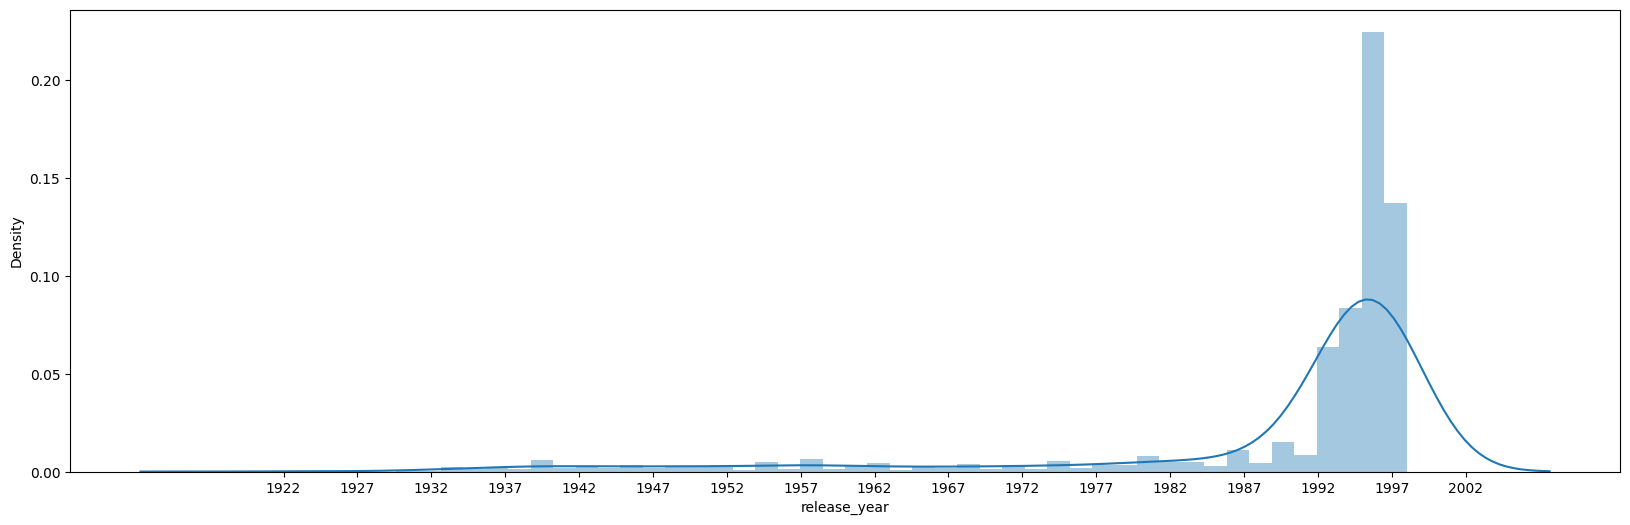

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
min_year = movies_info_df['release_year'].min()
plt.figure(figsize=(20,6))
dist = sns.distplot(movies_info_df['release_year'])
dist.set_xticks([min_year + 5 * x for x in range(17)])
plt.show()

From the illustrated distribution above, we can clearly see that the majority of the movies were released between 1992-1998. The following cell displays their proportion.

In [16]:
proportion = len(movies_info_df[(movies_info_df['release_year']>=1992) & (movies_info_df['release_year']<=1998)]) / len(movies_info_df)
round(proportion, 2)

0.78

### Year-Genre Heatmap:

In [17]:
genre_by_year = movies_info_df.groupby('release_year').sum()
genre_by_year.drop(columns=['movie_id', 'movie_name'], inplace=True)

genre_by_year = genre_by_year[genre_by_year.index >= 1980]


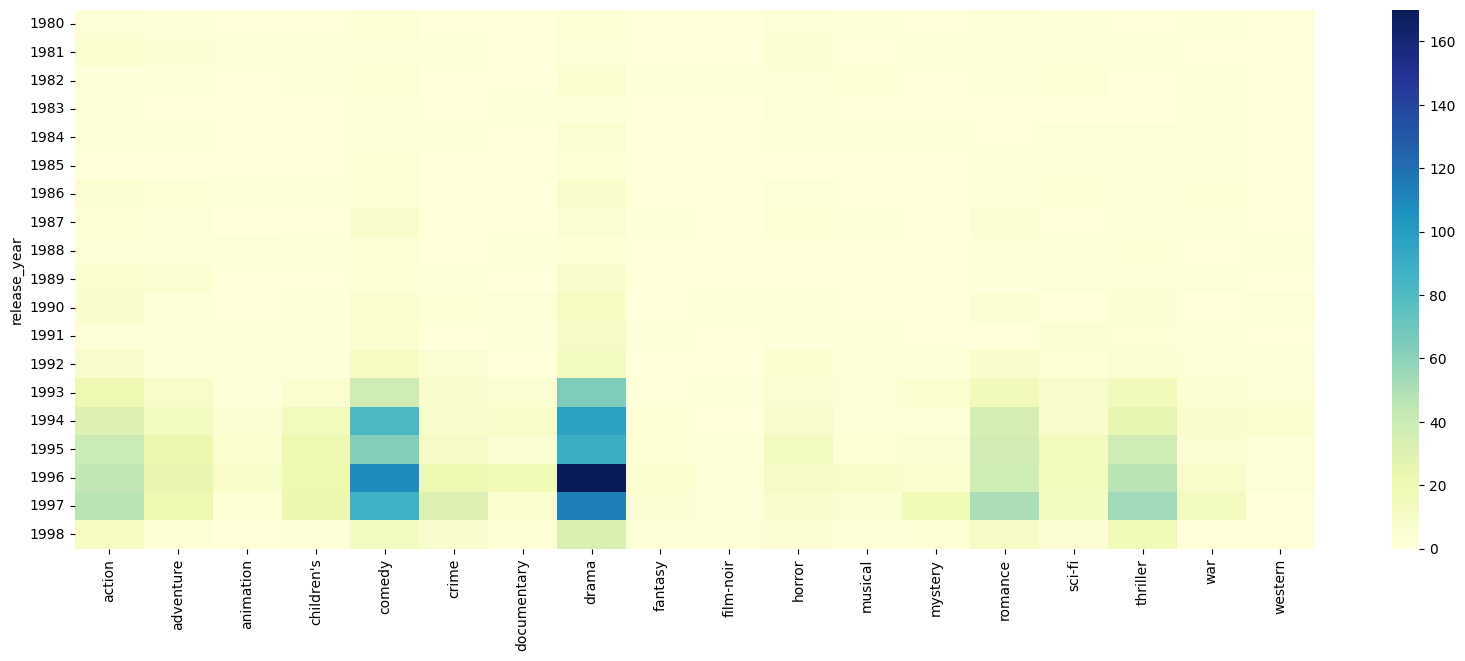

In [18]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heat map to plot the above table
plt.show()

## Users:

### Preparation & Checks:

In [19]:
users_df = pd.read_csv(f"{RAW_DATASET_DIR}/u.user", sep="|", names =["user_id", "age", "gender", "occupation", "zip_code"], header=None)
users_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
users_df.isna().apply(pd.value_counts)

,user_id,age,gender,occupation,zip_code
False,943,943,943,943,943


No missing values for the users dataframe

### Age Distribution:

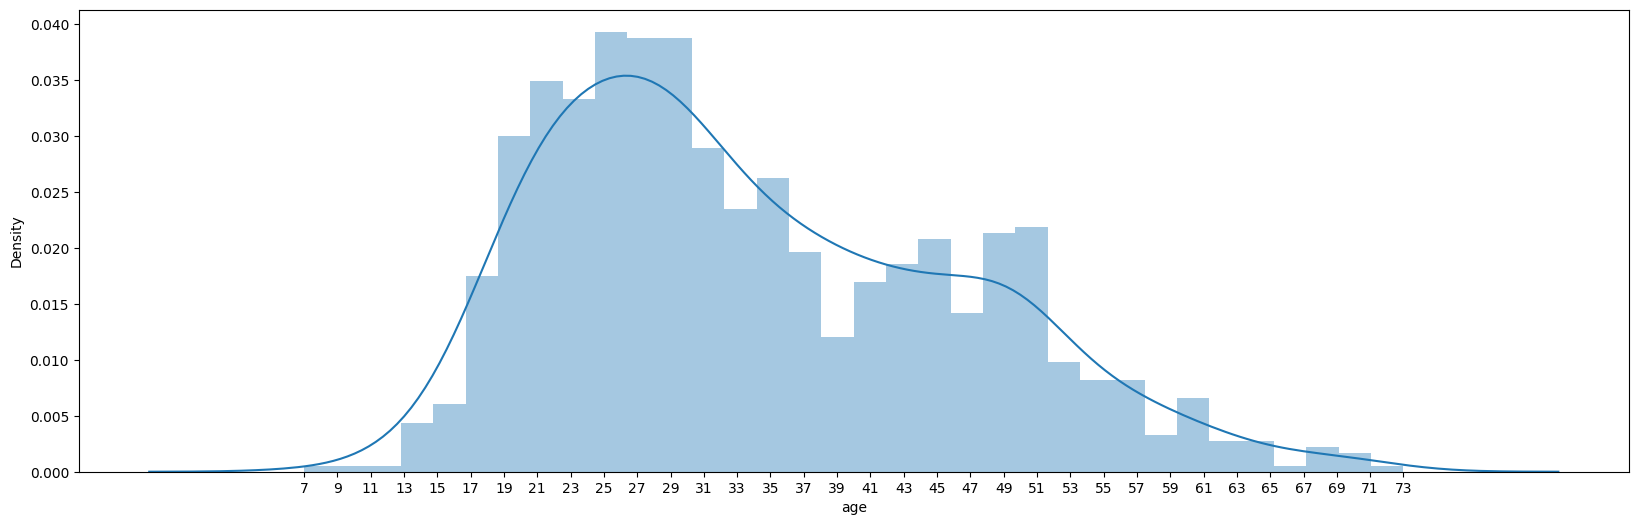

In [21]:
plt.figure(figsize=(20,6))

age_range = range(users_df['age'].min(), users_df['age'].max()+ 1, 2) 

age_dist = sns.distplot(users_df['age'], bins=len(age_range))
age_dist.set_xticks(age_range)
plt.show()

Although the dataset contains a very vast range of ages for people who did the ratings [7-73]. We can see, according to the illustrated distribution above, that almost **half** of the ratings came from people aged between 19-33. The following cell displays their proportion.

In [22]:
proportion = len(users_df[(users_df['age']>=19) & (users_df['age']<=33)]) / len(users_df)
round(proportion, 2)

0.5

### Gender Distribution:

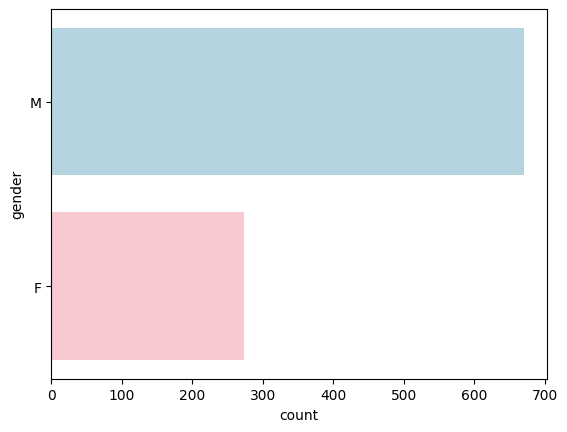

In [23]:
sns.countplot(users_df['gender'], palette=['lightblue','pink'])
plt.show()

We can see that the number of males is more than double the females in the dataset. Let's find out their proportion.

In [24]:
m_proportion = len(users_df[users_df['gender'] == 'M']) / len(users_df)
m_over_f_proportion = len(users_df[users_df['gender'] == 'M']) / len(users_df[users_df['gender'] == 'F'])
print(f"Male percentage: {(m_proportion*100):.2f}%")
print(f"Male/Female proporiton: {m_over_f_proportion:.2f}")

Male percentage: 71.05%
Male/Female proporiton: 2.45


### Occupation:

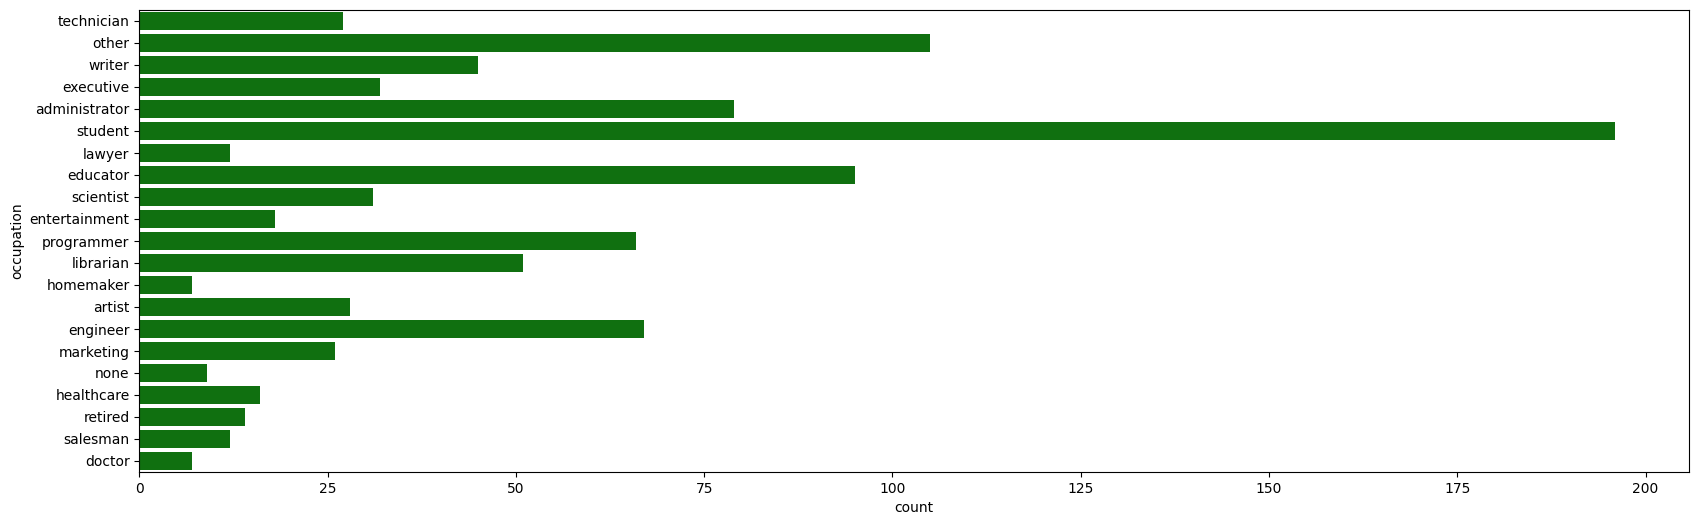

In [25]:
plt.figure(figsize=(20,6))

sns.countplot(users_df['occupation'], color= 'green')
plt.show()

## Ratings (Main dataset):

In [26]:
ratings_df = pd.read_csv(f"{RAW_DATASET_DIR}/u.data", names=["user_id", "movie_id", "rating", "timestamp"], sep="\t", header=None)
ratings_df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Normalize Ratings:

In [27]:
ratings_df['rating'] = (ratings_df['rating'] - 1) / 5

### Most 10 rated movies:

In [28]:
# Assuming ratings_df is your actual dataframe
# Get the count of ratings for each movie and take the top 10.
top_10_rated_movies = ratings_df.groupby('movie_id').size().nlargest(10).index

# Now, calculate the average rating for these top 10 most rated movies.
average_ratings = ratings_df[ratings_df['movie_id'].isin(top_10_rated_movies)] \
    .groupby('movie_id')['rating'].mean().round(1).sort_values(ascending=False).reset_index()

movie_id_to_name = movies_info_df.set_index('movie_id')['movie_name'].to_dict()

# Replace 'movie_id' in 'average_ratings' with 'movie_name' using the mapping.
average_ratings['movie_name'] = average_ratings['movie_id'].map(movie_id_to_name)
average_ratings = average_ratings[['movie_id', 'movie_name', 'rating']]

average_ratings

,movie_id,movie_name,rating
0,50,Star Wars,0.7
1,1,Toy Story,0.6
2,100,Fargo,0.6
3,181,Return of the Jedi,0.6
4,258,Contact,0.6
5,121,Independence Day (ID4),0.5
6,286,"English Patient, The",0.5
7,288,Scream,0.5
8,300,Air Force One,0.5
9,294,Liar Liar,0.4


### Frequency of rating values:

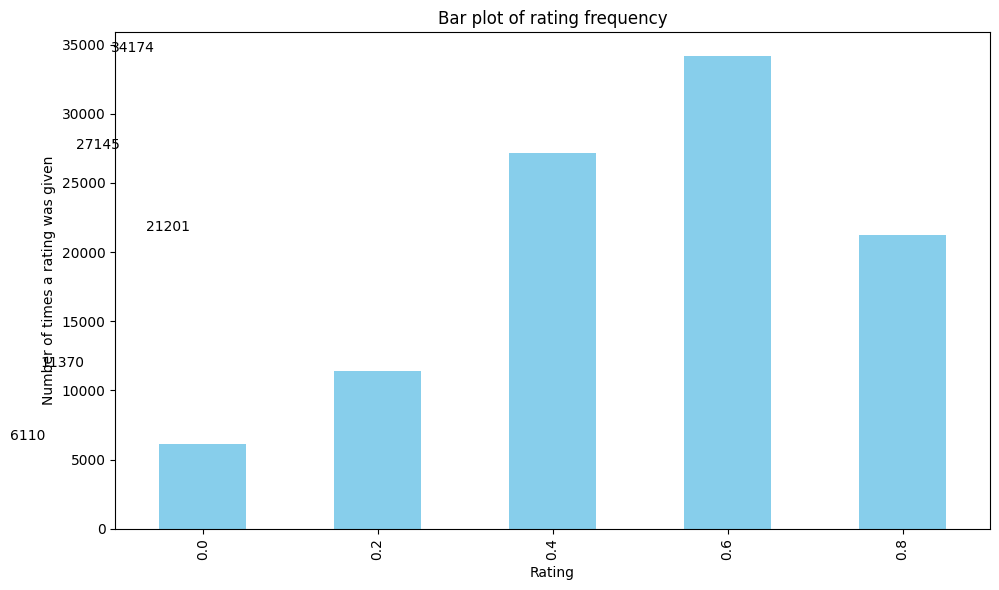

In [29]:
# Calculate the frequency of each rating.
rating_counts = ratings_df['rating'].value_counts().sort_index()

# Plot the frequencies of each rating.
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')

# Adding the count above each bar
for index, value in rating_counts.items():
    plt.text(index - 1, value + 300, str(value), ha='center')

# Setting the title and labels
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')

# Display the plot.
plt.tight_layout()
plt.show()

# Save Intermediate Data:

In [42]:
INTERIM_DATA_DIR = "../data/interim/"

ratings_df.to_csv(f"{INTERIM_DATA_DIR}ratings.csv", index=None)
users_df.to_csv(f"{INTERIM_DATA_DIR}users.csv", index=None)
movies_info_df.to_csv(f"{INTERIM_DATA_DIR}movies_info.csv", index=None)


# Reporting
- Summary of Findings
- Model Details
- Evaluation Results
- Discussion on Potential Improvements